<a href="https://colab.research.google.com/github/enitin-agarwal/azureforaws/blob/master/hw2_programming_base_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to generate a normalized weight vector w
def generate_normalized_weights(dimension=10):
    w = np.random.randn(dimension)  # Generate from N(0, 1)
    w /= np.linalg.norm(w)  # Normalize to have Euclidean norm = 1
    return w

# Function to generate training data
def generate_data(m, dimension=10):
    # Step 1: Generate the true weight vector w
    w = generate_normalized_weights(dimension)

    # Step 2: Generate feature matrix X (size m x dimension) from N(0, I)
    X = np.random.randn(m, dimension)

    # Step 3: Generate labels Y based on probability from sigmoid(w · xi)
    Y = np.zeros(m)
    for i in range(m):
        # Calculate dot product w · xi
        dot_product = np.dot(w, X[i])

        # Calculate probability P[y_i = +1] = sigmoid(w · xi)
        prob = sigmoid(dot_product)

        # Assign label y_i as +1 with probability prob, else 0
        Y[i] = 1 if np.random.rand() <= prob else 0

    # Return the true weight vector w, feature matrix X, and label vector Y
    return w, X, Y

# Example Usage
m = 50  # Number of training examples
dimension = 10  # Dimension of each feature vector

# Generate data
w_true, X, Y = generate_data(m, dimension)

# Print sample results
print("True Weight Vector (w):", w_true)
print("Sample X[0]:", X[0])
print("Sample Y[0]:", Y[0])

True Weight Vector (w): [-2.19902751e-01  2.06842676e-01 -8.00453016e-01  3.02178333e-01
  1.73316745e-01 -2.57725521e-02 -8.51336348e-05  1.11344960e-01
 -2.00671957e-02  3.65128463e-01]
Sample X[0]: [-0.330804    1.01069931 -0.26954679  1.31914212  1.12478638 -0.21534963
  1.09724747 -0.09651023  0.13337001 -1.03774519]
Sample Y[0]: 1.0


## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Sigmoid function for probability calculation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to generate a normalized weight vector w
def generate_normalized_weights(dimension=10):
    w = np.random.randn(dimension)  # Generate from N(0, 1)
    w /= np.linalg.norm(w)  # Normalize to make its Euclidean norm = 1
    return w

# Function to generate training data
def generate_data(m, dimension=10):
    w = generate_normalized_weights(dimension)
    X = np.random.randn(m, dimension)
    Y = np.zeros(m)

    for i in range(m):
        dot_product = np.dot(w, X[i])
        prob = sigmoid(dot_product)
        Y[i] = 1 if np.random.rand() <= prob else 0

    return w, X, Y

# Function to train logistic regression and learn w'
def train_logistic_regression(X, Y):
    # Standardize the features (important for logistic regression)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and fit logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_scaled, Y)

    # Get the learned weights w'
    w_learned = model.coef_[0]  # Extract learned weights
    return w_learned

# Function to compare true and learned weights
def compare_weights(w_true, w_learned):
    # Calculate the Euclidean distance between w_true and w_learned
    distance = np.linalg.norm(w_true - w_learned)
    return distance

# Example Usage
m = 50  # Number of training examples
dimension = 10  # Dimension of each feature vector

# Generate data
w_true, X, Y = generate_data(m, dimension)

# Train logistic regression and get the learned weights
w_learned = train_logistic_regression(X, Y)

# Compare the true weights w and the learned weights w'
distance = compare_weights(w_true, w_learned)

# Print results
print("True Weight Vector (w):", w_true)
print("Learned Weight Vector (w'):", w_learned)
print("Euclidean Distance between w and w':", distance)

True Weight Vector (w): [-0.19531936  0.07886269 -0.37119817 -0.15350594  0.33982162  0.21331145
 -0.51568593  0.42128566 -0.40265895 -0.16658497]
Learned Weight Vector (w'): [ 0.13999108  0.37224492 -0.12681291 -0.44207037  0.48836713  0.30028694
 -0.44003395  0.07059238 -0.04337673 -0.40996305]
Euclidean Distance between w and w': 0.829551631229264


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute the gradient of square loss for a single data point
def gradient_of_loss(w, x, y):
    dot_product = np.dot(w, x)
    sigma = sigmoid(dot_product)
    gradient = (sigma - y) * sigma * (1 - sigma) * x
    return gradient

# Function to perform gradient descent
def gradient_descent(X, Y, eta=0.01, num_iterations=1000):
    dimension = X.shape[1]  # Number of features
    w = np.random.randn(dimension)  # Initialize weights randomly

    for _ in range(num_iterations):
        gradient_sum = np.zeros(dimension)
        for i in range(len(Y)):
            gradient_sum += gradient_of_loss(w, X[i], Y[i])

        # Update weights using the average gradient and learning rate eta
        w -= eta * gradient_sum / len(Y)

    return w

# Example Usage
m = 50  # Number of training examples
dimension = 10  # Dimension of each feature vector

# Generate data
w_true, X, Y = generate_data(m, dimension)

# Train using gradient descent
w_learned = gradient_descent(X, Y, eta=0.01, num_iterations=1000)

# Compare the true weights w and the learned weights w'
distance = compare_weights(w_true, w_learned)

# Print results
print("True Weight Vector (w):", w_true)
print("Learned Weight Vector (w'):", w_learned)
print("Euclidean Distance between w and w':", distance)

import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute the gradient of square loss for a single data point
def gradient_of_loss(w, x, y):
    dot_product = np.dot(w, x)
    sigma = sigmoid(dot_product)
    gradient = (sigma - y) * sigma * (1 - sigma) * x
    return gradient

# Function to perform stochastic gradient descent
def stochastic_gradient_descent(X, Y, eta=0.01, num_iterations=1000):
    dimension = X.shape[1]  # Number of features
    w = np.random.randn(dimension)  # Initialize weights randomly

    m = len(Y)  # Number of training examples

    for _ in range(num_iterations):
        # Select a random index
        random_index = np.random.randint(m)
        x_i = X[random_index]
        y_i = Y[random_index]

        # Compute the gradient for the selected data point
        gradient = gradient_of_loss(w, x_i, y_i)

        # Update weights using the gradient and learning rate eta
        w -= eta * gradient

    return w

# Example Usage
m = 50  # Number of training examples
dimension = 10  # Dimension of each feature vector

# Generate data
w_true, X, Y = generate_data(m, dimension)

# Train using stochastic gradient descent
w_learned = stochastic_gradient_descent(X, Y, eta=0.01, num_iterations=1000)

# Compare the true weights w and the learned weights w'
distance = compare_weights(w_true, w_learned)

# Print results
print("True Weight Vector (w):", w_true)
print("Learned Weight Vector (w'):", w_learned)
print("Euclidean Distance between w and w':", distance)


True Weight Vector (w): [-0.3517137   0.10130683  0.513111    0.05427408  0.08573037 -0.27868839
  0.52574767 -0.09626626  0.45030311 -0.16229051]
Learned Weight Vector (w'): [-0.5546779   0.42523851 -1.43777322  0.25659399  0.76881414 -1.06931633
  0.65793506 -2.03569261 -0.25292291 -0.5486638 ]
Euclidean Distance between w and w': 3.0834013667038644
True Weight Vector (w): [-0.38794993 -0.34271176 -0.18870498  0.49785622 -0.12896336 -0.30713086
 -0.16420456  0.25990691 -0.32493981 -0.37082555]
Learned Weight Vector (w'): [ 0.5958623   0.14588992  0.48723182 -0.14499634  0.60862297 -0.2226065
  0.55614762  1.12352113 -2.09502814  1.11283456]
Euclidean Distance between w and w': 3.037621246714772


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w -
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

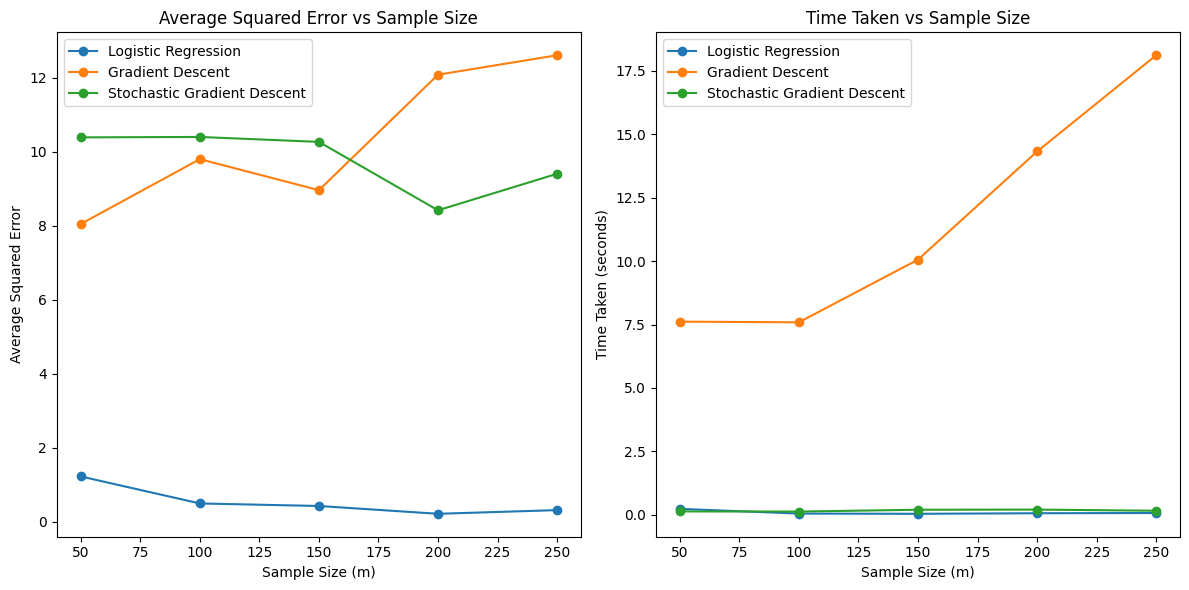

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Function to compute squared Euclidean distance
def squared_distance(w_true, w_learned):
    return np.sum((w_true - w_learned) ** 2)

# Function to measure error and time for each algorithm
def evaluate_algorithms(sample_sizes, num_repeats=10):
    errors_logistic = []
    errors_gd = []
    errors_sgd = []
    times_logistic = []
    times_gd = []
    times_sgd = []

    for m in sample_sizes:
        logistic_errors = []
        gd_errors = []
        sgd_errors = []

        start_time = time.time()
        for _ in range(num_repeats):
            # Generate data
            w_true, X, Y = generate_data(m)

            # Algorithm 1: Logistic Regression
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            model = LogisticRegression(max_iter=1000)
            model.fit(X_scaled, Y)
            w_learned = model.coef_[0]
            logistic_errors.append(squared_distance(w_true, w_learned))
        times_logistic.append(time.time() - start_time)

        start_time = time.time()
        for _ in range(num_repeats):
            # Generate data
            w_true, X, Y = generate_data(m)

            # Algorithm 2: Gradient Descent
            w_learned = gradient_descent(X, Y, eta=0.01, num_iterations=1000)
            gd_errors.append(squared_distance(w_true, w_learned))
        times_gd.append(time.time() - start_time)

        start_time = time.time()
        for _ in range(num_repeats):
            # Generate data
            w_true, X, Y = generate_data(m)

            # Algorithm 3: Stochastic Gradient Descent
            w_learned = stochastic_gradient_descent(X, Y, eta=0.01, num_iterations=1000)
            sgd_errors.append(squared_distance(w_true, w_learned))
        times_sgd.append(time.time() - start_time)

        # Average errors for each algorithm
        errors_logistic.append(np.mean(logistic_errors))
        errors_gd.append(np.mean(gd_errors))
        errors_sgd.append(np.mean(sgd_errors))

    return (errors_logistic, errors_gd, errors_sgd,
            times_logistic, times_gd, times_sgd)

# Example usage and plotting
sample_sizes = [50, 100, 150, 200, 250]
errors_logistic, errors_gd, errors_sgd, times_logistic, times_gd, times_sgd = evaluate_algorithms(sample_sizes)

# Plotting the errors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, errors_logistic, label='Logistic Regression', marker='o')
plt.plot(sample_sizes, errors_gd, label='Gradient Descent', marker='o')
plt.plot(sample_sizes, errors_sgd, label='Stochastic Gradient Descent', marker='o')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Squared Error')
plt.title('Average Squared Error vs Sample Size')
plt.legend()

# Plotting the time taken
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, times_logistic, label='Logistic Regression', marker='o')
plt.plot(sample_sizes, times_gd, label='Gradient Descent', marker='o')
plt.plot(sample_sizes, times_sgd, label='Stochastic Gradient Descent', marker='o')
plt.xlabel('Sample Size (m)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs Sample Size')
plt.legend()

plt.tight_layout()
plt.show()


# Problem 2

In [ ]:
from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

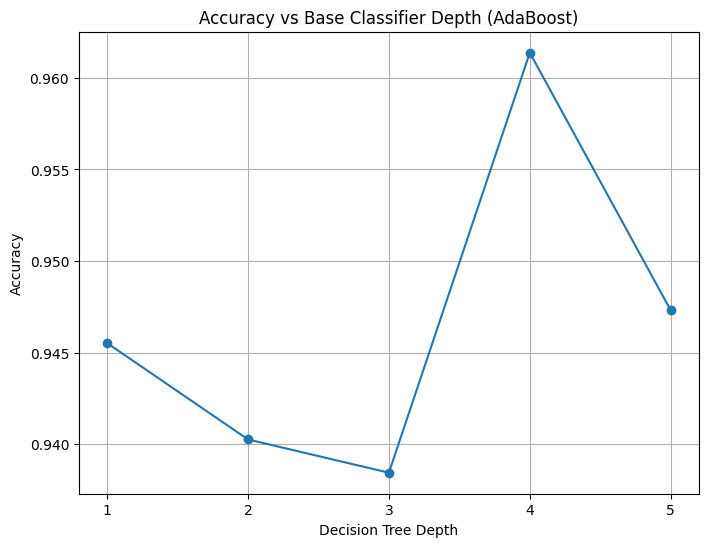

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Initialize lists to store the results
depths = range(1, 6)
accuracies = []

# Loop over each depth from 1 to 5
for depth in depths:
    # Create the base learner (decision tree) with max_depth
    base_learner = DecisionTreeClassifier(max_depth=depth, random_state=101)

    # Create the AdaBoost classifier with the decision tree as the base learner
    ada_clf = AdaBoostClassifier(estimator=base_learner,
                                 n_estimators=10,
                                 learning_rate=1,
                                 random_state=101)

    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(ada_clf, X, y, cv=10, scoring='accuracy')

    # Compute the mean accuracy and store it
    accuracies.append(np.mean(cv_scores))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs Base Classifier Depth (AdaBoost)')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()
